<a href="https://colab.research.google.com/github/sinhasurapto/Predict_House_Price/blob/main/HousingPricesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
dataset = pd.read_csv('/content/House_Price_India.csv')
dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
# First 10 rows of the dataset
dataset.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
5,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
6,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
7,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
8,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000
9,6762814787,42491,5,2.50,2820,67518,2.0,0,0,3,...,1979,0,122011,52.8094,-114.215,2820,48351,2,51,675000


In [ ]:
# Last 10 rows of the dataset
dataset.tail(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14609,6762828349,42734,4,2.75,1810,7350,1.0,0,0,4,...,1980,0,122065,52.6003,-114.361,1750,7350,1,73,272000
14610,6762828783,42734,3,1.75,1350,7686,1.0,0,0,3,...,1987,0,122024,52.5917,-114.242,1370,7686,2,70,261000
14611,6762828856,42734,3,1.00,1180,5350,1.5,0,0,4,...,1959,0,122063,52.7350,-114.449,1490,5350,3,54,260000
14612,6762829600,42734,3,1.00,1400,10425,1.0,0,0,4,...,1968,0,122040,52.5038,-114.491,1440,10425,2,59,241500
14613,6762829669,42734,3,1.75,1590,7931,1.0,0,0,3,...,1979,0,122024,52.5928,-114.240,1680,7931,1,80,240000
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.00,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [ ]:
# Dimensions of dataset
dataset.shape

(14619, 23)

In [ ]:
# Columns in the dataset
dataset.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
# Dataset overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [ ]:
# Statistical summary of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14619.0,6.762821e+09,6237.161975,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14619.0,4.260455e+04,67.343747,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14619.0,3.379233e+00,0.938655,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14619.0,2.129557e+00,0.769955,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14619.0,2.098157e+03,928.218740,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14619.0,1.509369e+04,37920.885355,5.200000e+02,5.010500e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14619.0,1.502326e+00,0.540241,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14619.0,7.661263e-03,0.087196,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14619.0,2.328477e-01,0.765651,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14619.0,3.430399e+00,0.664047,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# Unique values in each column
dataset.nunique()

,0
id,14619
Date,241
number of bedrooms,12
number of bathrooms,29
living area,865
lot area,7451
number of floors,6
waterfront present,2
number of views,5
condition of the house,5


In [ ]:
# Identify unique prices
unique_prices = dataset['Price'].unique()
print("Unique values in 'price':")
print(unique_prices)
print(f"Total unique values: {len(unique_prices)}")

Unique values in 'price':
[1400000 1200000  838000 ...  221700  219200  146000]
Total unique values: 2901


In [ ]:
# Check for null values in each column
null_values_per_column = dataset.isnull().any(axis=0)
null_values_per_column

,0
id,False
Date,False
number of bedrooms,False
number of bathrooms,False
living area,False
lot area,False
number of floors,False
waterfront present,False
number of views,False
condition of the house,False


In [ ]:
# Check for duplicate values
dataset.duplicated().sum()

0

In [ ]:
# Dropping 'id' and 'Date' columns
dataset.drop(['id', 'Date'], inplace=True, axis=1)
dataset

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,0,4,7,1556,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,3,2.00,1680,7000,1.5,0,0,4,7,1680,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,2,1.00,1070,6120,1.0,0,0,3,6,1070,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,4,1.00,1030,6621,1.0,0,0,4,6,1030,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
# Function to rename the columns to make the names of the columns consistent
def rename_columns(columns):
    return columns.lower().replace(' ','_')

# Rename the columns
dataset.rename(columns=rename_columns, inplace=True)
dataset.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

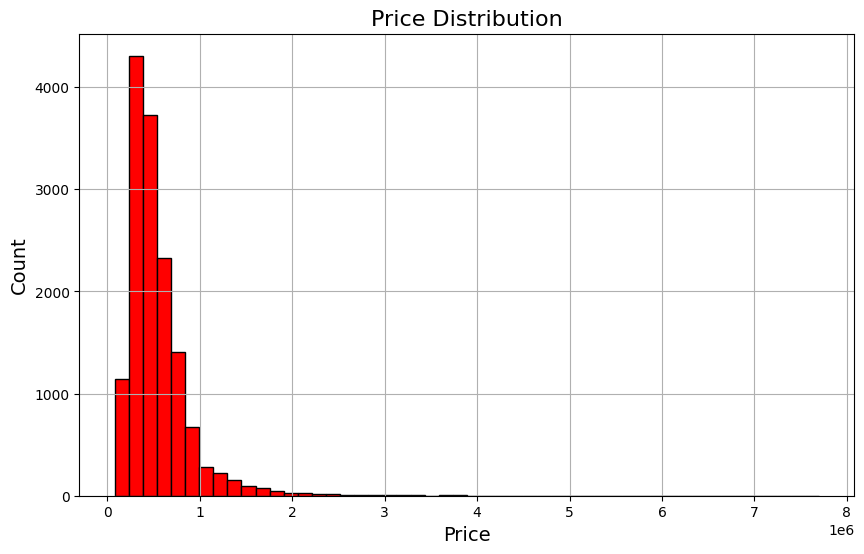

In [ ]:
# Check the distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(dataset['price'], bins=50, color='red', edgecolor='black')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Features from which outliers need to be removed
features_to_clean = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
    'number_of_floors', 'condition_of_the_house', 'grade_of_the_house',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement',
    'built_year', 'postal_code', 'lattitude',
    'longitude', 'living_area_renov', 'lot_area_renov',
    'number_of_schools_nearby', 'distance_from_the_airport'
]

# Function to remove outliers
def remove_outliers_iqr(dataset, features):
    for feature in features:
        Q1 = dataset[feature].quantile(0.25)
        Q3 = dataset[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)]
    return dataset

# Store original price statistics
original_price_min = dataset['price'].min()
original_price_max = dataset['price'].max()
original_price_values = dataset['price'].unique()

# Remove outliers from the specified features
dataset_cleaned = remove_outliers_iqr(dataset, features_to_clean)

# Display the shape of the dataframe before and after cleaning
print(f"Original shape: {dataset.shape}")
print(f"Cleaned shape: {dataset_cleaned.shape}")

# Verify if 'price' values changed
cleaned_price_min = dataset_cleaned['price'].min()
cleaned_price_max = dataset_cleaned['price'].max()
cleaned_price_values = dataset_cleaned['price'].unique()

# Compare original and cleaned values
print(f"Original price min: {original_price_min}, max: {original_price_max}")
print(f"Cleaned price min: {cleaned_price_min}, max: {cleaned_price_max}")
print(f"Original unique price values: {original_price_values}")
print(f"Cleaned unique price values: {cleaned_price_values}")

Original shape: (14619, 21)
Cleaned shape: (10560, 21)
Original price min: 78000, max: 7700000
Cleaned price min: 82000, max: 2000000
Original unique price values: [1400000 1200000  838000 ...  221700  219200  146000]
Cleaned unique price values: [1400000 1200000  805000 ...  614285  219200  146000]


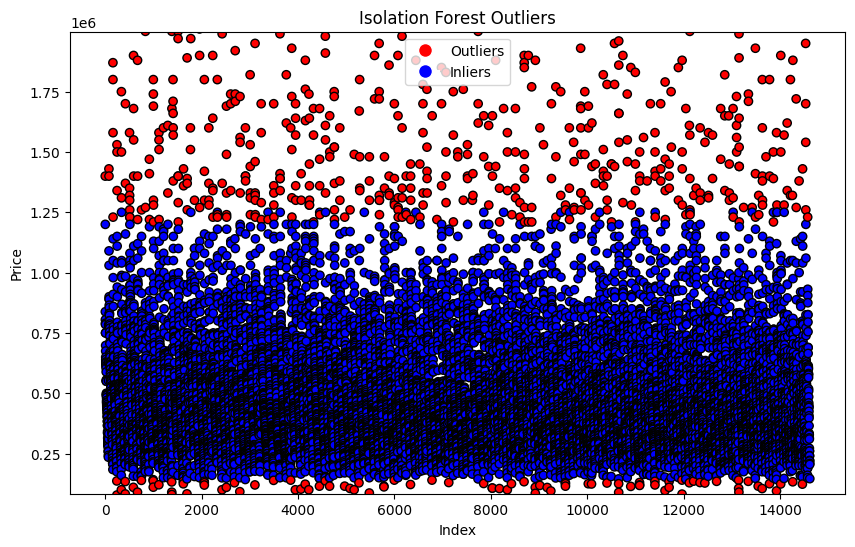

Minimum price: 82000
Maximum price: 2000000


In [ ]:
# Import to identify outliers using Isolation Forest
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
outlier_scores = iso_forest.fit_predict(dataset[['price']])

# Define colors based on outlier scores
colors = ['red' if score == -1 else 'blue' for score in outlier_scores]

# Determine the y-axis limits based on the 5th and 95th percentiles
y_min = dataset_cleaned['price'].quantile(0.00005)
y_max = dataset_cleaned['price'].quantile(0.999999)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset['price'], c=colors, edgecolor='k')
plt.ylim([y_min, y_max])  # Set y-axis limits
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Isolation Forest Outliers')

# Adding legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Outliers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Inliers')
]
plt.legend(handles=handles)
plt.show()

# Check the minimum and maximum price in the original data
min_price = dataset_cleaned['price'].min()
max_price = dataset_cleaned['price'].max()
print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

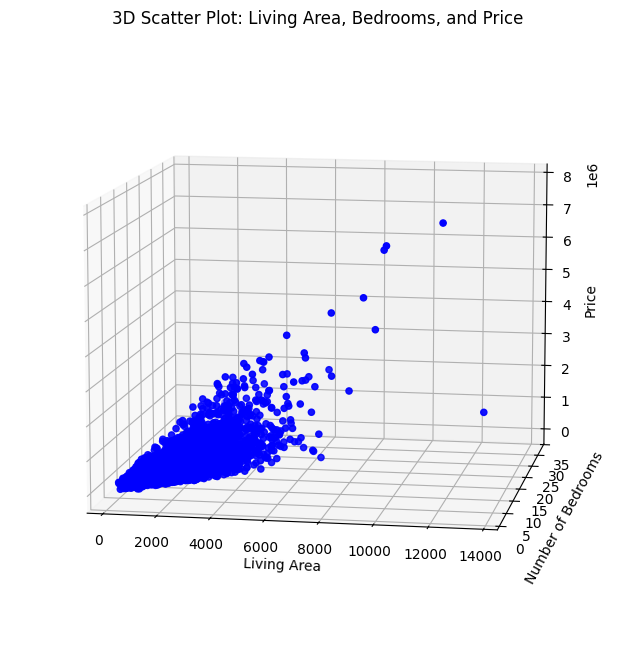

In [ ]:
# Import library for 3D visualization
from mpl_toolkits.mplot3d import Axes3D

# Plot to identify relationship between 'living_area' and 'number_of_bedrooms', and 'price'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['living_area'], dataset['number_of_bedrooms'], dataset['price'], c='b', marker='o')
ax.view_init(elev=10, azim=280)  # Adjust elev and azim to change orientation
ax.set_xlabel('Living Area')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
plt.title('3D Scatter Plot: Living Area, Bedrooms, and Price')
plt.show()

<Figure size 1000x1000 with 0 Axes>

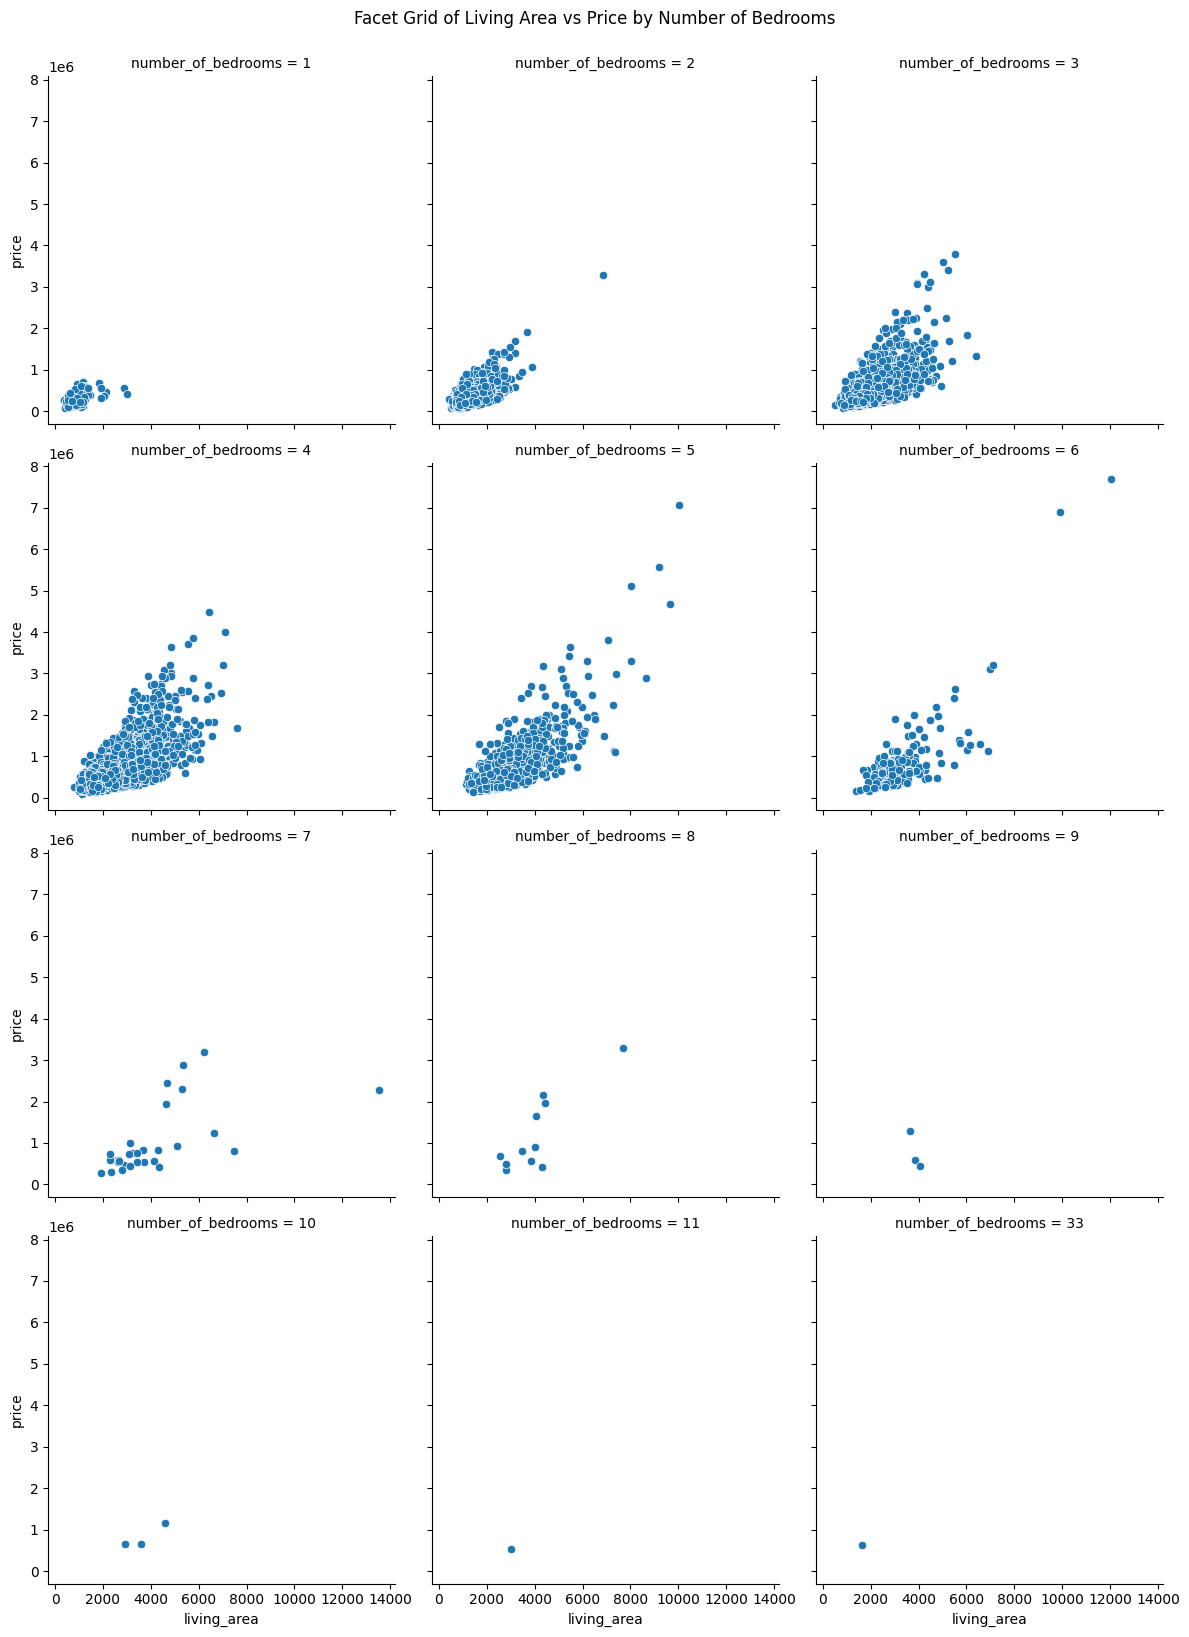

In [ ]:
# Facet grid between 'living_area' and 'price' by 'number_of_bedrooms'
plt.figure(figsize=(10, 10))
g = sns.FacetGrid(dataset, col='number_of_bedrooms', col_wrap=3, height=4)
g.map(sns.scatterplot, 'living_area', 'price')
g.fig.suptitle('Facet Grid of Living Area vs Price by Number of Bedrooms', y=1.02)
plt.show()

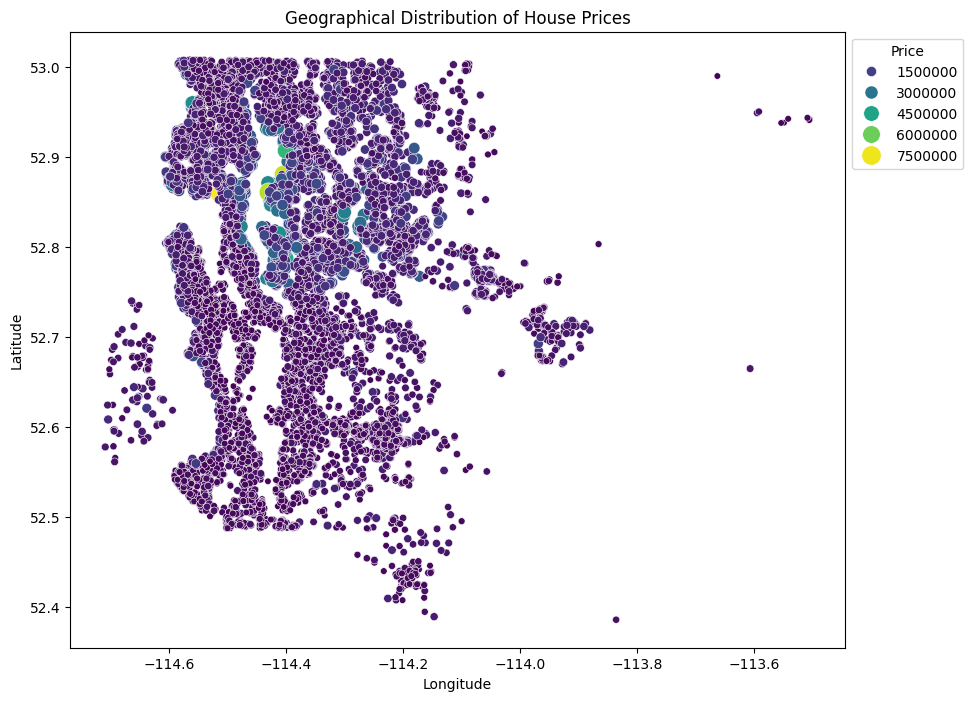

In [ ]:
# Geographical distribution of house prices
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='lattitude', hue='price', data=dataset, palette='viridis', size='price', sizes=(20, 200))
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

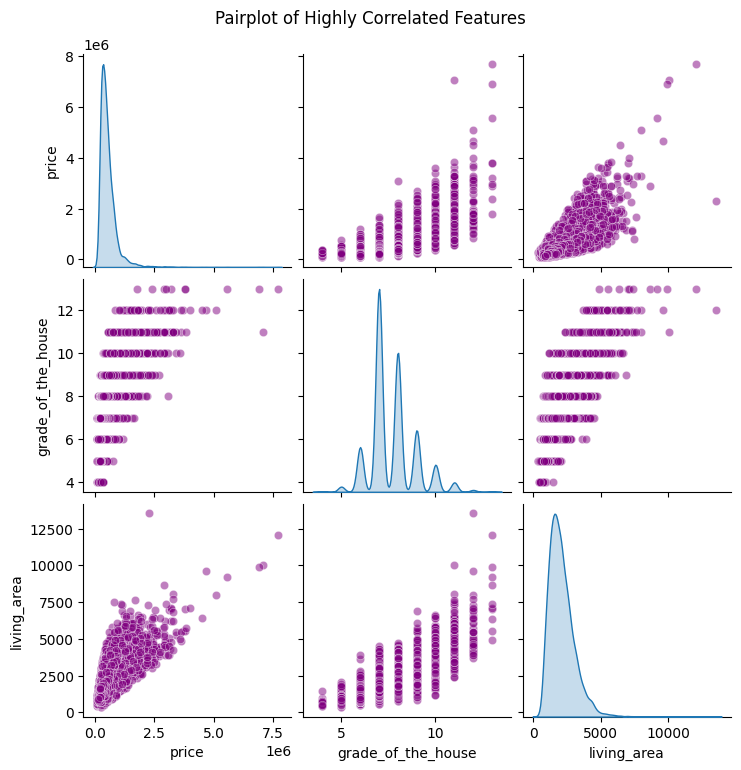

In [ ]:
# Specify the columns you want to include in the pairplot
selected_columns = ['price', 'grade_of_the_house', 'living_area']

# Create a new DataFrame with the selected columns
dataset_selected = dataset[selected_columns]

# Perform pairplot
sns.pairplot(dataset_selected, diag_kind='kde', plot_kws={'alpha':0.5, 'color': 'purple'})
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

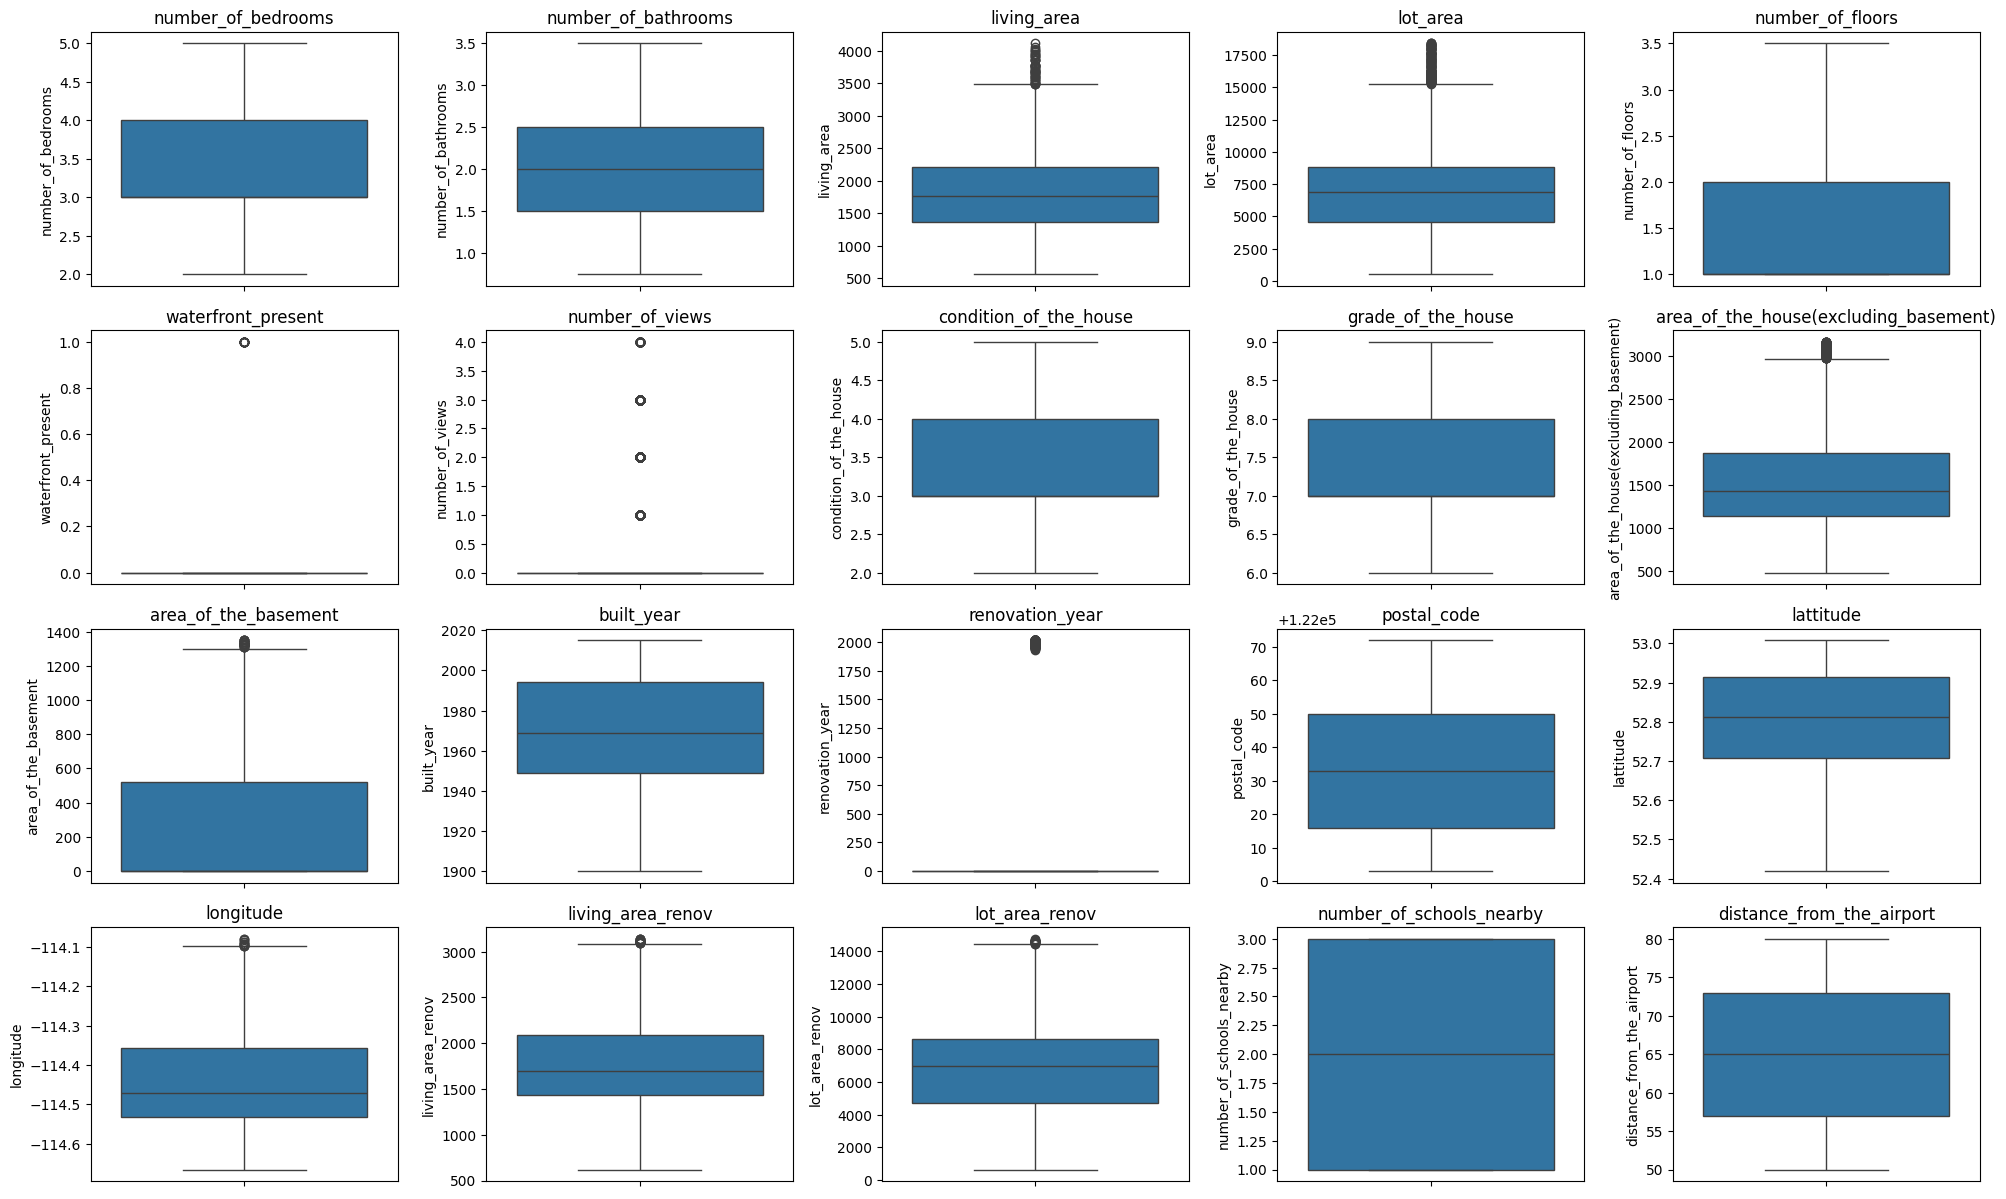

In [ ]:
# List of features for the box plot
features = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
    'number_of_floors', 'waterfront_present', 'number_of_views',
    'condition_of_the_house', 'grade_of_the_house',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement',
    'built_year', 'renovation_year', 'postal_code', 'lattitude',
    'longitude', 'living_area_renov', 'lot_area_renov',
    'number_of_schools_nearby', 'distance_from_the_airport'
]

# Create a box plot for each feature
plt.figure(figsize=(20, 15))

# Iterate over the features and create a box plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=dataset_cleaned[feature])
    plt.title(feature)

# Adjust the layout
plt.tight_layout()
plt.show()

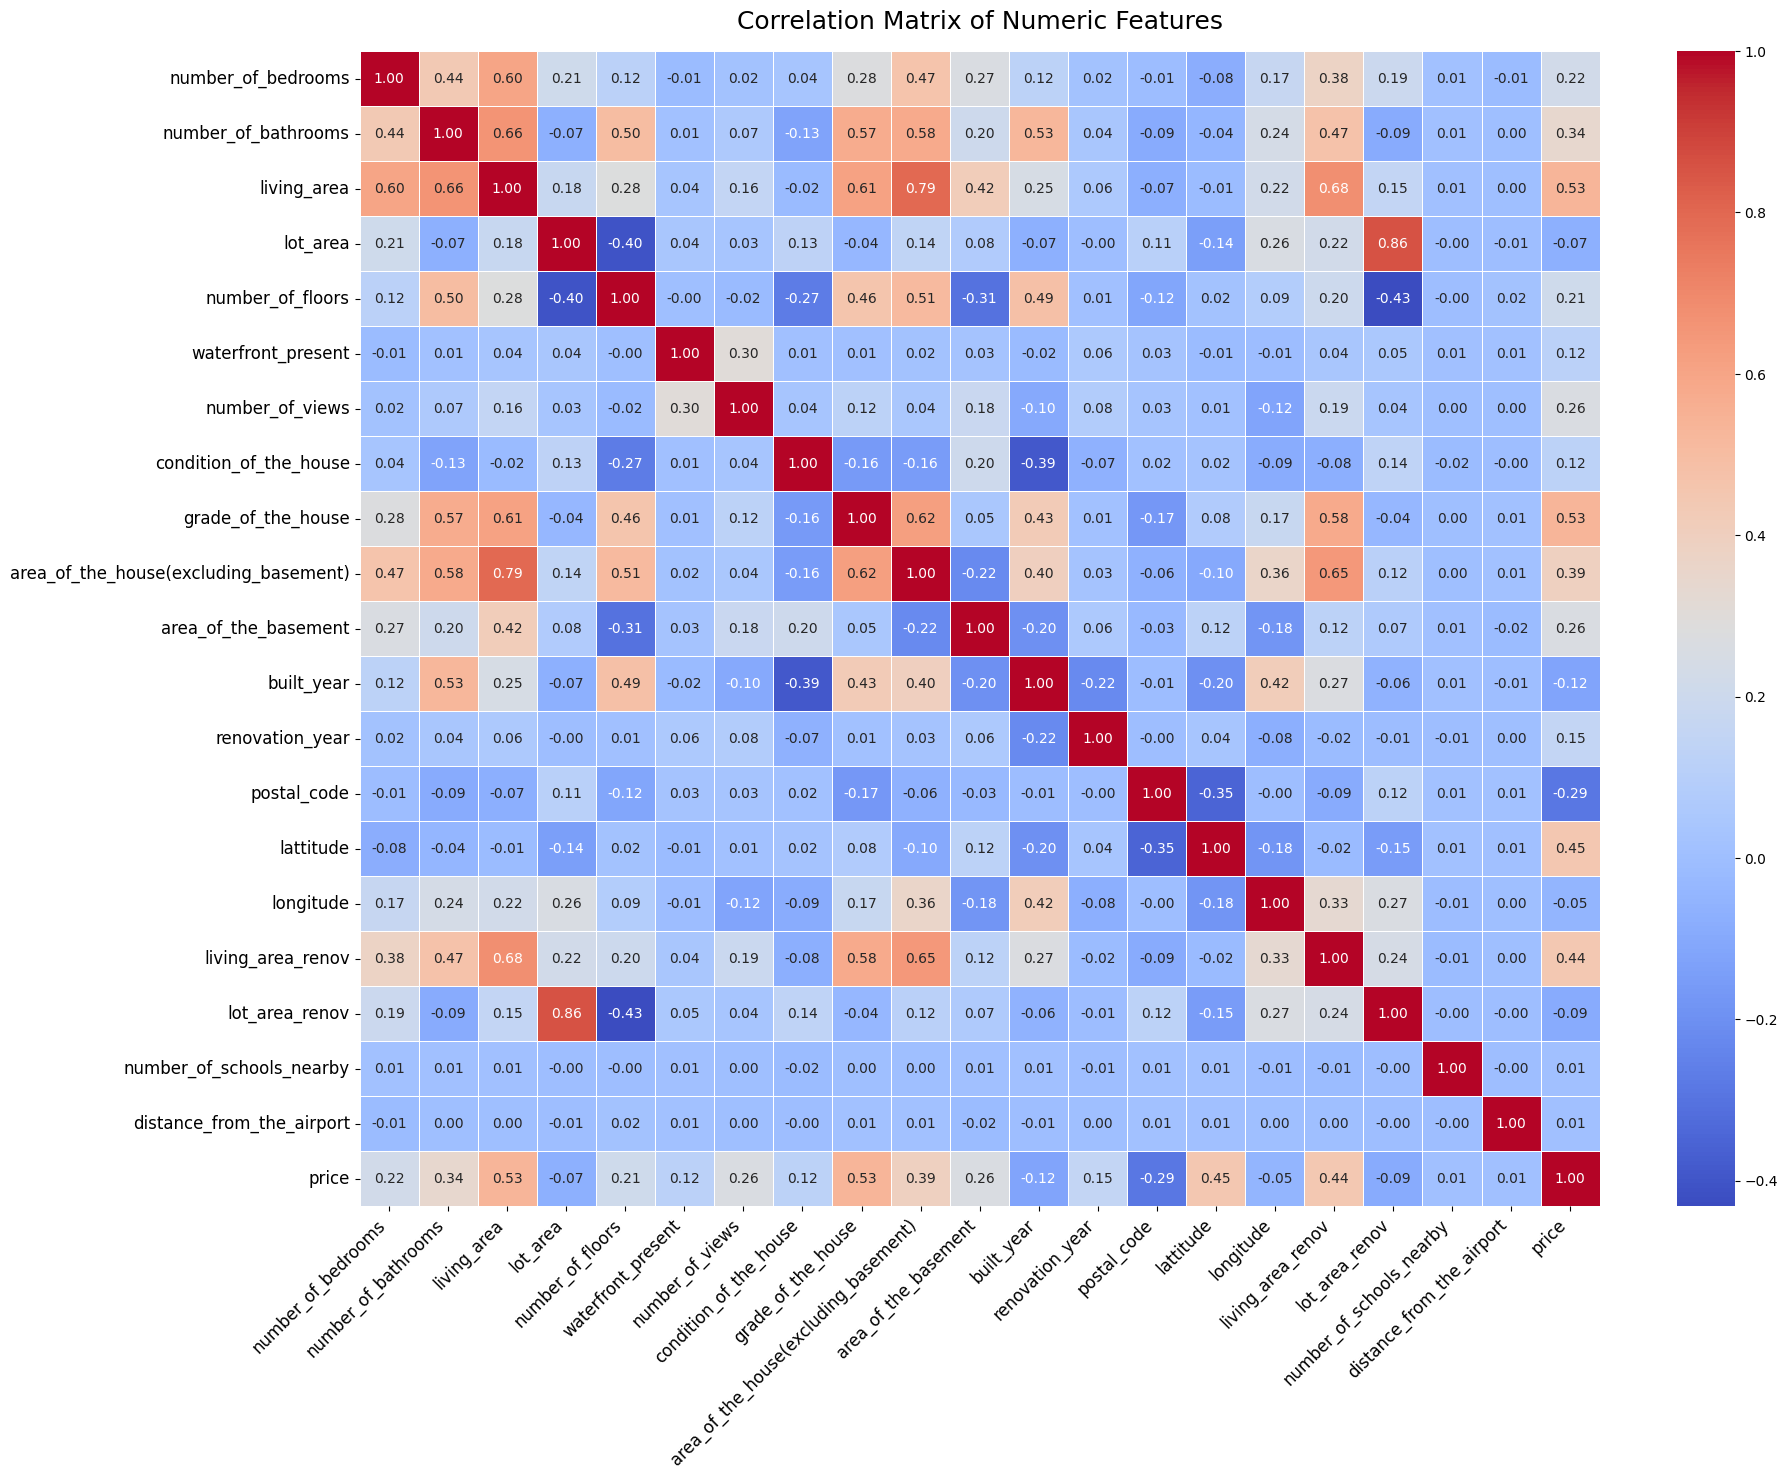

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(dataset_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')
heatmap.set_title('Correlation Matrix of Numeric Features', fontdict={'fontsize': 18}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [ ]:
# Filter dataset to only include the top features
top_features = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area', 'built_year', 'number_of_floors',
    'grade_of_the_house', 'number_of_views', 'postal_code', 'lattitude', 'longitude', 'living_area_renov', 'lot_area_renov',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement'
]
X = dataset_cleaned[top_features]
y = dataset_cleaned['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import important libraries for the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the values
rf_predictions = rf_model.predict(X_test)

# Compute the results for the Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest MSE score: ", rf_mse)
print("Random Forest R² score: ", rf_r2)
print("Random Forest MAE score: ", rf_mae)

Random Forest MSE score:  7525281275.869531
Random Forest R² score:  0.8380642495243853
Random Forest MAE score:  54053.58624931231


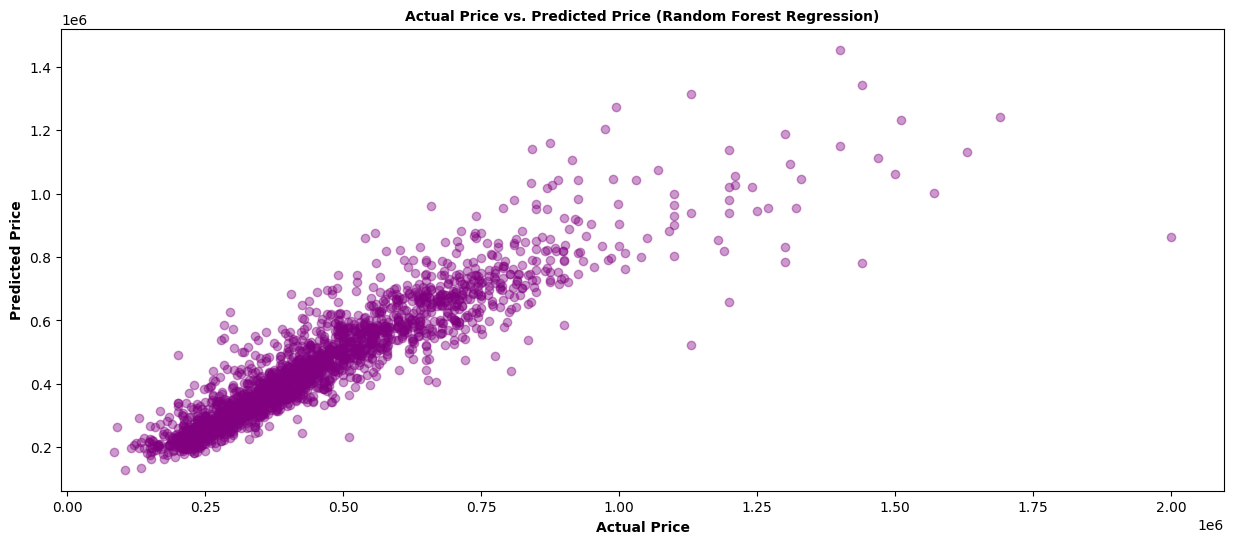

In [ ]:
# Plot Actual Price vs. Predicted Price (Random Forest Regression)
plt.figure(figsize = ((15, 6)))
plt.scatter(x=y_test, y=rf_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (Random Forest Regression)', weight='bold', fontsize=10)
plt.xlabel('Actual Price', weight ='bold')
plt.ylabel('Predicted Price', weight ='bold')
plt.show()

                                  Feature  Importance
9                               lattitude    0.436281
2                             living_area    0.263410
10                              longitude    0.051245
6                      grade_of_the_house    0.050538
11                      living_area_renov    0.046457
4                              built_year    0.040317
13  area_of_the_house(excluding_basement)    0.020483
7                         number_of_views    0.019090
8                             postal_code    0.018615
12                         lot_area_renov    0.016380
3                                lot_area    0.015783
14                   area_of_the_basement    0.008363
1                     number_of_bathrooms    0.006902
0                      number_of_bedrooms    0.003866
5                        number_of_floors    0.002270


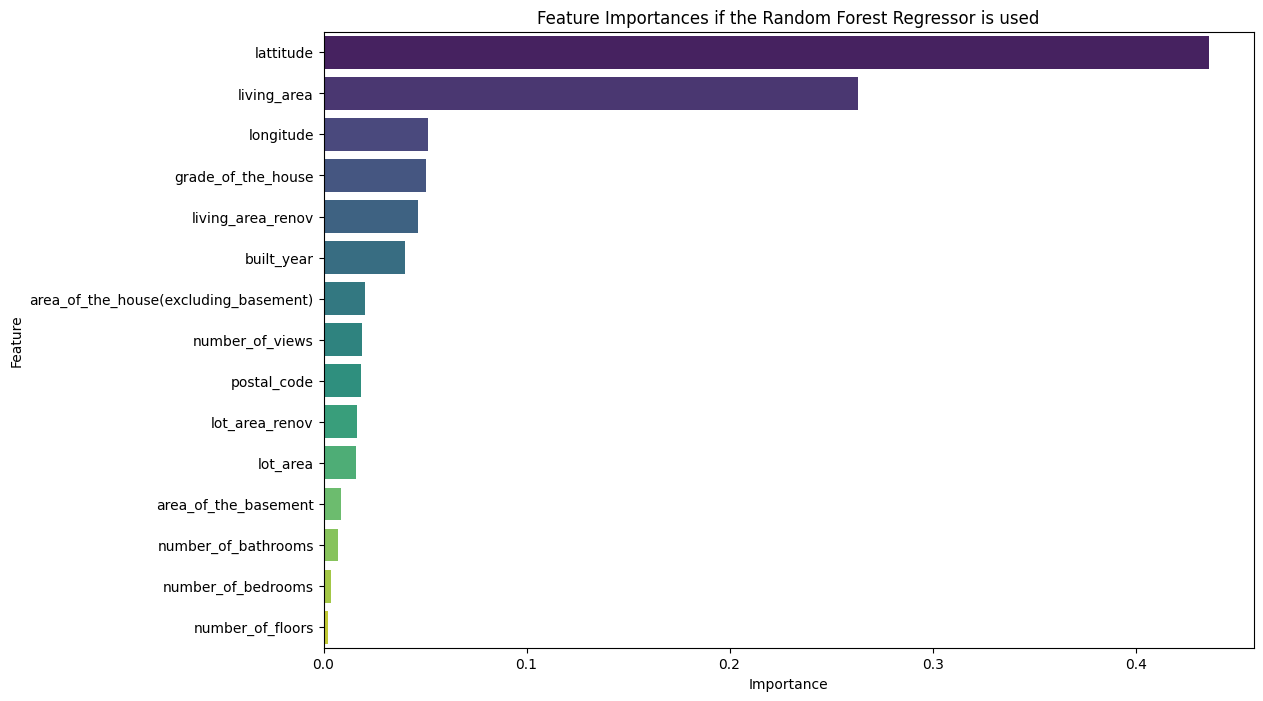

In [ ]:
# Feature names
feature_names = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area', 'built_year', 'number_of_floors',
    'grade_of_the_house', 'number_of_views', 'postal_code', 'lattitude', 'longitude', 'living_area_renov', 'lot_area_renov',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement'
]

# Identifying feature importances
rf_feature_importances = rf_model.feature_importances_

# Ensure lengths match before creating DataFrame
if len(rf_feature_importances) == len(feature_names):
    rf_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_feature_importances
    })

# Sort the DataFrame by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
print(rf_importance_df)

# Plot importances as bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances if the Random Forest Regressor is used')
plt.show()

In [ ]:
# Import important libraries for the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predict the values
gbr_predictions = gbr_model.predict(X_test)

# Compute the results for the Gradient Boosting Regressor model
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
print("Gradient Boosting MSE score: ", gbr_mse)
print("Gradient Boosting R² score: ", gbr_r2)
print("Gradient Boosting MAE score: ", gbr_mae)

Gradient Boosting MSE score:  8615516013.959661
Gradient Boosting R² score:  0.8146036008077284
Gradient Boosting MAE score:  59524.75322467814


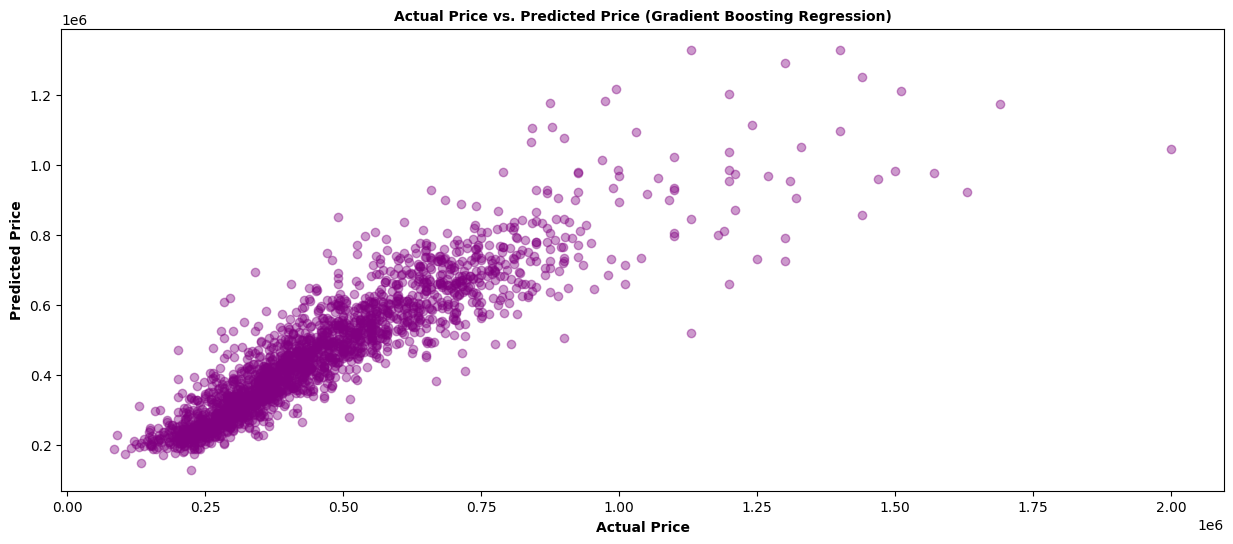

In [ ]:
# Plot Actual Price vs. Predicted Price (Gradient Boosting)
plt.figure(figsize = ((15, 6)))
plt.scatter(x = y_test, y = gbr_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (Gradient Boosting Regression)', weight = 'bold', fontsize = 10)
plt.xlabel('Actual Price', weight = 'bold')
plt.ylabel('Predicted Price', weight = 'bold')
plt.show()

                                  Feature  Importance
9                               lattitude    0.457250
2                             living_area    0.226639
6                      grade_of_the_house    0.112516
4                              built_year    0.069744
11                      living_area_renov    0.037831
7                         number_of_views    0.025666
8                             postal_code    0.025534
10                              longitude    0.018495
13  area_of_the_house(excluding_basement)    0.015499
12                         lot_area_renov    0.003533
3                                lot_area    0.003366
14                   area_of_the_basement    0.001678
0                      number_of_bedrooms    0.001163
1                     number_of_bathrooms    0.001087
5                        number_of_floors    0.000000


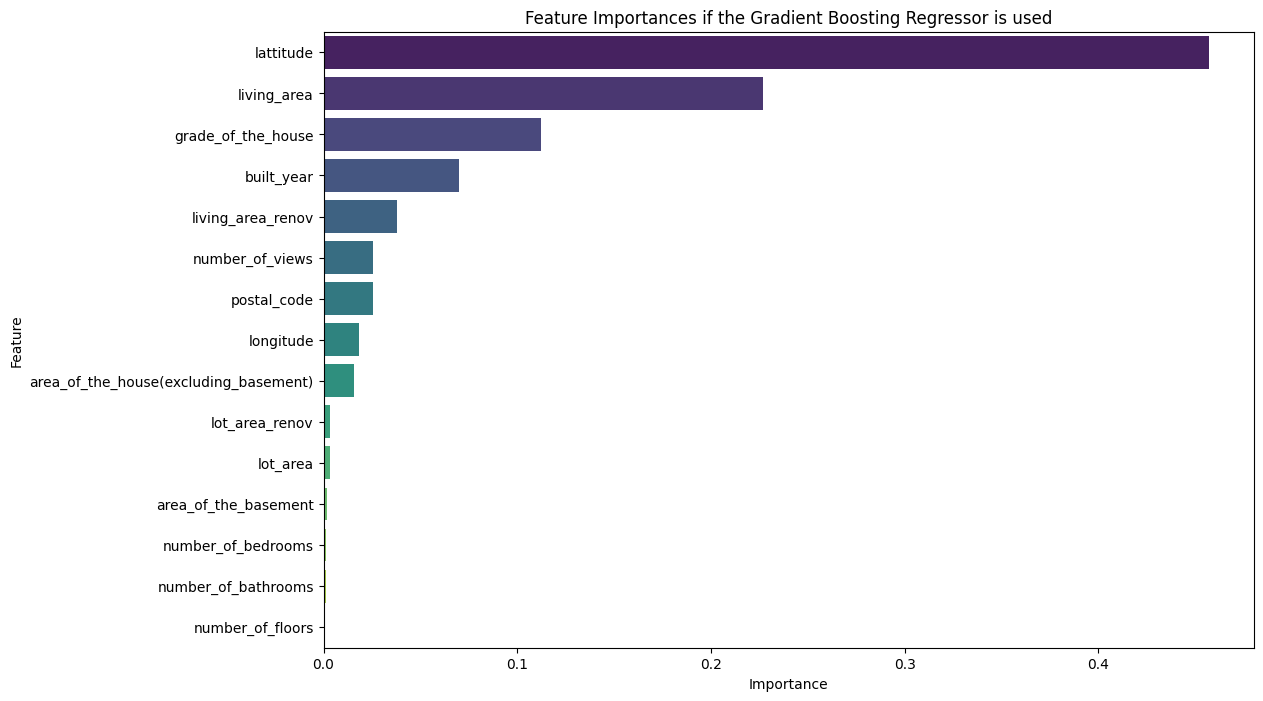

In [ ]:
# Feature names
feature_names = [
    'number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area', 'built_year', 'number_of_floors',
    'grade_of_the_house', 'number_of_views', 'postal_code', 'lattitude', 'longitude', 'living_area_renov', 'lot_area_renov',
    'area_of_the_house(excluding_basement)', 'area_of_the_basement'
]

# Identifying feature importances
gbr_feature_importances = gbr_model.feature_importances_

# Ensure lengths match before creating DataFrame
if len(gbr_feature_importances) == len(feature_names):
    gbr_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': gbr_feature_importances
    })

# Sort the DataFrame by importance
gbr_importance_df = gbr_importance_df.sort_values(by='Importance', ascending=False)
print(gbr_importance_df)

# Plot importances as bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gbr_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances if the Gradient Boosting Regressor is used')
plt.show()

In [ ]:
# Train the CatBoost Regression model as meta-model with Random Forest and Gradient Boosting as base models

# Import libraries
from catboost import CatBoostRegressor

# Instantiate the CatBoostRegressor model as meta-model
cb_model = CatBoostRegressor(loss_function='RMSE')

# Predictions for Random Forest and Gradient Boosting on training set
y_train_random_forest_regressor = rf_model.predict(X_train)
y_train_gradient_boosting = gbr_model.predict(X_train)

# Stack train predictions for the meta-model
stacked_train_preds = np.column_stack((y_train_random_forest_regressor, y_train_gradient_boosting))

# Fit the model
cb_model.fit(stacked_train_preds, y_train)

Learning rate set to 0.05736
0:	learn: 193669.7315215	total: 52.3ms	remaining: 52.2s
1:	learn: 183618.7050226	total: 55.2ms	remaining: 27.5s
2:	learn: 174098.2335155	total: 62.4ms	remaining: 20.7s
3:	learn: 165214.9812343	total: 66.1ms	remaining: 16.5s
4:	learn: 156792.6263310	total: 72.9ms	remaining: 14.5s
5:	learn: 148973.0327804	total: 75.6ms	remaining: 12.5s
6:	learn: 141393.9761746	total: 82.7ms	remaining: 11.7s
7:	learn: 134285.3695202	total: 85.8ms	remaining: 10.6s
8:	learn: 127599.3683269	total: 92.7ms	remaining: 10.2s
9:	learn: 121345.5070279	total: 95.4ms	remaining: 9.44s
10:	learn: 115397.2858097	total: 102ms	remaining: 9.19s
11:	learn: 110132.2655110	total: 105ms	remaining: 8.63s
12:	learn: 104809.0613010	total: 112ms	remaining: 8.5s
13:	learn: 99926.1144330	total: 119ms	remaining: 8.36s
14:	learn: 95331.3062663	total: 123ms	remaining: 8.09s
15:	learn: 90949.1019775	total: 126ms	remaining: 7.75s
16:	learn: 86873.0840935	total: 133ms	remaining: 7.71s
17:	learn: 83014.6343153

In [ ]:
# Make predictions for the meta-model

# Stack test predictions
stacked_test_preds = np.column_stack((rf_predictions, gbr_predictions))

# Prediction
cb_predictions = cb_model.predict(stacked_test_preds)

In [ ]:
# Evaluate the meta-model

# Mean Squared Error (MSE)
cb_mse = mean_squared_error(y_test, cb_predictions)
print('CatBoost MSE score: ', cb_mse)

# R-squared Score
cb_r2 = r2_score(y_test, cb_predictions)
print('CatBoost R2 score: ', cb_r2)

# Mean Absolute Error (MAE)
cb_mae = mean_absolute_error(y_test, cb_predictions)
print('CatBoost MAE score: ', cb_mae)

CatBoost MSE score:  8119429922.809565
CatBoost R2 score:  0.8252788261615638
CatBoost MAE score:  56564.47320650386


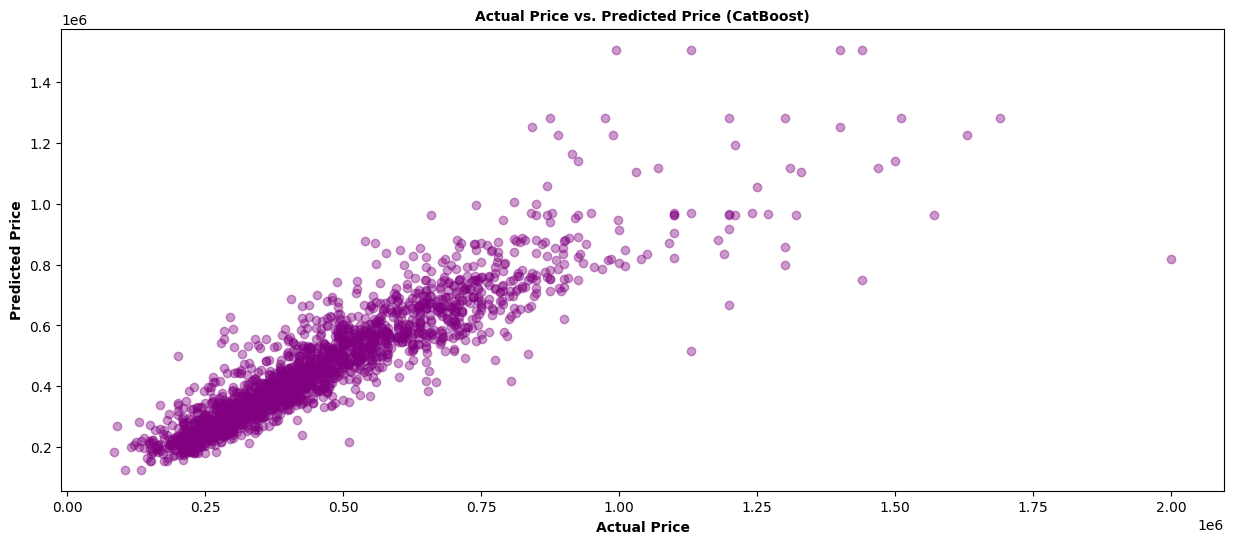

In [ ]:
# Plot Actual Price vs. Predicted Price (CatBoost)
plt.figure(figsize = ((15, 6)))
plt.scatter(x=y_test, y = cb_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (CatBoost)', weight = 'bold', fontsize = 10)
plt.xlabel('Actual Price', weight = 'bold')
plt.ylabel('Predicted Price', weight = 'bold')
plt.show()

Text(0.5, 0, 'Model')

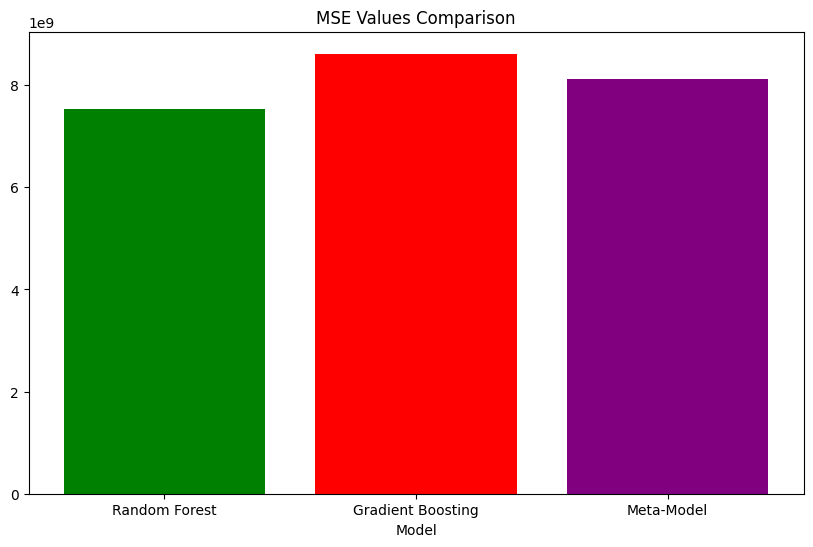

In [ ]:
# Bar-chart for MSE values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
mse_values = [rf_mse, gbr_mse, cb_mse]
plt.figure(figsize=(10, 6))
plt.title('MSE Values Comparison')
plt.bar(labels, mse_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

Text(0.5, 0, 'Model')

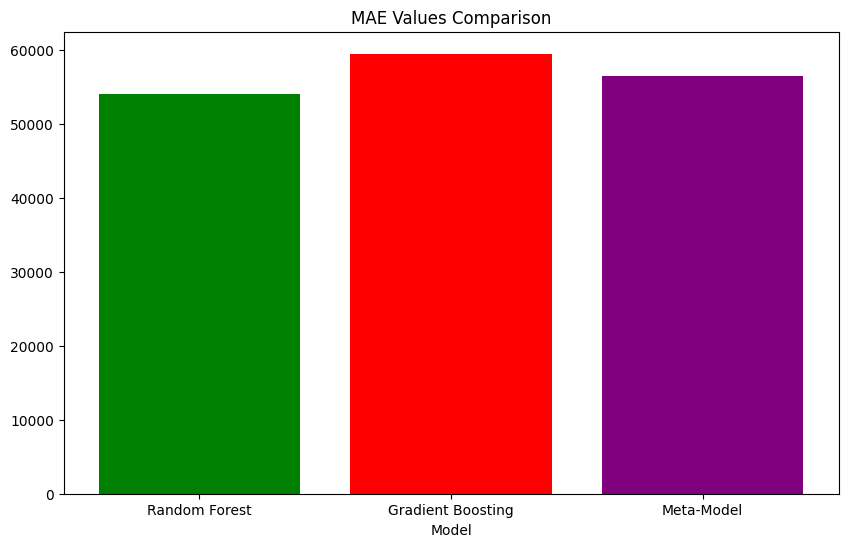

In [ ]:
# Bar-chart for MAE values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
mae_values = [rf_mae, gbr_mae, cb_mae]
plt.figure(figsize=(10, 6))
plt.title('MAE Values Comparison')
plt.bar(labels, mae_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

Text(0.5, 0, 'Model')

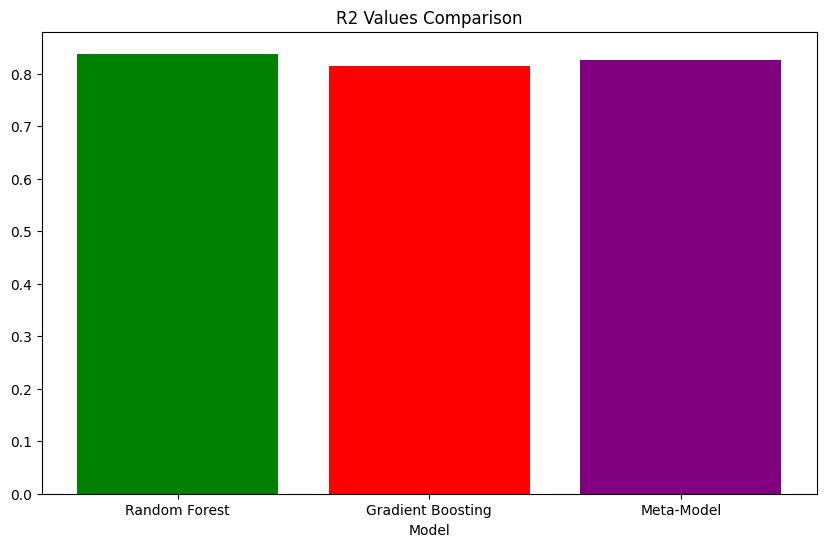

In [ ]:
# Bar-chart for R2 values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
r2_values = [rf_r2, gbr_r2, cb_r2]
plt.figure(figsize=(10, 6))
plt.title('R2 Values Comparison')
plt.bar(labels, r2_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

In [ ]:
# Save the Random Forest model
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
# Save the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gbr_model, file)

In [ ]:
# Save the CatBoost model
with open('cat_boost_model.pkl', 'wb') as file:
    pickle.dump(cb_model, file)